In [7]:
import sys
assert sys.version_info >= (3, 7)

In [10]:
import numpy as np
import pandas as pd

In [11]:
np.random.seed(42)

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 12)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

### 선형회귀 모델 구현

선형회귀 모델의 구현과정은 일반적으로 아래 다섯 단계로 이루어진다.

1. 문제 정의
1. 데이터 구하기
1. 데이터 적재, 정제, 전처리
1. 모델 선택과 훈련
1. 모델 활용

#### 1단계 : 문제 정의

어느 국가의 1인당 GDP가 알려졌을 때 해당 국가의 삶의 만족도를 예측하는 몰델을 구현해야 한다.

#### 2단계 : 데이터 구하기

모델 훈련에 사용되는 훈련 셋은 입력 데이터 셋과 타깃target 데이터 셋으로 구분된다. 모델 훈련은 입력 데이터와 티갓 데이터 사이의 관계를 가장 적절하게 묘사하는 모델을 학습하는 과정이다.

1인당 GDP와 삶의 만족도 사이의 관계를 가장 적절하게 묘사하는 모델의 훈련에 사용되는 훈련 셋은 다음과 같다.

- 입력 데이터
    - 국가별 1인당 GDP 데이터
    - 출처 : 국제통화기금(IMF)의 '세계 경제전망 데이터베이스'
- 타깃 데이터
    - OECD 회원 국가별 '삶의 만족도'(life satisfaction) 데이터
    - 출처 : OECD의 '더 나음 삶의 지수'(BLI, Better Life index)

훈련 데이터를 구하는 과정을 여기서는 특정 서버에 저장된 다음 두 개의 csv 파일을 다운로드 하는 것으로 대체한다.

- gdp_per_capita_2015.csv
    - IMF(국제통화기금)에 제공하는 1인당 국내 총생산 데이터(GDP) 데이터

- oecd_bil_2015.csv
    - 2015년도 기준 OECD 국가들의 '더 나은 삶의 지수'(BLI) 데이터

최종적으로 아래 표와 같은 데이터를 생성해야 하는데 언급된 데이터 파일을 다운로드 하면 전혀 다른 모양의 데이터가 파일에 포함되어 있다. 이어지는 3단계에서 원본 데이터 파일에서 아래 모양의 표를 어떻게 유도해낼 수 있는지 자세히 설명한다. 설명 이해가 어렵다면 4단계로 넘아가도 선형회귀 모델의 훈련 과정을 이해할 수 있다. 하지만 훈련 보다는 데이터를 준비하는 과정이 일반적으로 더 중요하기에 3단계를 최대한 이해하도록 노력할 것을 권장한다.

#### 3단계: 데이터 적재, 정제, 전처리

컴퓨터에 저장된 또는 다운로드된 데이터는 일반적으로 바로 모델 훈련에 사용할 수 없으며, 데이터 적재, 데이터 정제, 데이터 전처리 등의 과정을 거쳐야 비로소 모델 훈련에 활용될 수 있다.

- 데이터 적재(data loading): 서버에 존재하거나 컴퓨터에 저장되어 있는 파일을 특정 자료형의 값으로 불러오는 과정

- 데이터 정제(data cleaning): 적재된 데이터 셋에 포함된 오류, 부정확한 값, 누락된 값, 상관없는 값 등을 제거, 수정, 보완하는 과정

- 데이터 전처리(data preprocessing): 정제된 데이터 셋을 모델 훈련에 적절한 형식으로 변환하거나 적절한 내용의 데이터를 추가하거나 삭제하는 과정

1인당 GDP 데이터 적재, 정재, 전처리

2015년 기준 국가별 1인당 GDP 관련 데이터가 저장되어 있는 서버 주소는 다음과 같다.

In [13]:
datapath = "https://raw.githubusercontent.com/codingalzi/handson-ml3/master/notebooks/data/lifesat/"

판다스의 read_csv() 함수는 지정된 경로에 저장된 csv 을 판다스의 데이터프레임 객체로 적재한다. 적재할 때 사용되는 옵션 인자는 다음과 같다.

- thousands=',': 1000단위로 쉼표 찍기
- delimiter='\t': 탭(tab)으로 열 구분
- encoding='latin1': 인코딩 방식 지정. 파일에서 사용된 'Côte d'Ivoire'(코트디브와르)와 같은 특수 알파벳을 사용하는 국가명 처리 용도임.
- na_values="n/a": 결측치를 'NaN'으로 처리.

In [14]:
gdp_per_capita_2015 = pd.read_csv(datapath + "gdp_per_capita_2015.csv",
                                thousands=',',
                                delimiter='\t',
                                encoding='latin1',
                                na_values="n/a")

In [15]:
gdp_per_capita_2015

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [16]:
gdp_per_capita_2015.set_index("Country", inplace=True)

gdp_per_capita_2015.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [17]:
gdp_per_capita_2015.rename(columns={"2015": "GDP per capita"}, inplace=True)

gdp_per_capita_2015.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


#### 삶의 만족도 데이터 적재, 정제, 전처리

OECD 국가별 삶의 만족도 데이터는 '더 나은 삶의 지수' 데이터 파일에 포함되어 있다. 따라서 먼저 해당 csv 파일을 판다스의 데이터프레임 객체로 불러온 후에 삶의 만족도와 관련된 내용을 추출하는 과정을 밟는다.

- pandas.read_csv() 함수는 지정한 경로에 저장되어 있는 csv 파일을 다운로드하여 바로 데이터프레임 객체를 생선한다.

In [21]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')

In [22]:
oecd_bli.shape

(3292, 17)

In [23]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [24]:
oecd_bli.Indicator.unique()

array(['Dwellings without basic facilities', 'Housing expenditure',
       'Rooms per person', 'Household net adjusted disposable income',
       'Household net financial wealth', 'Employment rate',
       'Job security', 'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Educational attainment',
       'Student skills', 'Years in education', 'Air pollution',
       'Water quality', 'Consultation on rule-making', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Assault rate', 'Homicide rate',
       'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [29]:
oecd_bli['Indicator'].unique()

array(['Dwellings without basic facilities', 'Housing expenditure',
       'Rooms per person', 'Household net adjusted disposable income',
       'Household net financial wealth', 'Employment rate',
       'Job security', 'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Educational attainment',
       'Student skills', 'Years in education', 'Air pollution',
       'Water quality', 'Consultation on rule-making', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Assault rate', 'Homicide rate',
       'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [26]:
oecd_bli.Indicator.unique().shape

(24,)

In [27]:
'Life satisfaction' in oecd_bli.Indicator.unique()

True

In [28]:
mask = oecd_bli.Indicator == 'Life satisfaction'
oecd_bli[mask].shape

(179, 17)

In [30]:
oecd_bli.INEQUALITY.unique()

array(['TOT', 'MN', 'WMN', 'HGH', 'LW'], dtype=object)

In [32]:
arr1 = oecd_bli.INEQUALITY.unique()

sum = 0
for ineq in arr1:
    num_lines = (oecd_bli['INEQUALITY'] == ineq).sum()
    print(f"{ineq:>3}:\t{num_lines}행")

    sum += num_lines

print(f"\n 총:\t{sum}행")

TOT:	888행
 MN:	881행
WMN:	881행
HGH:	328행
 LW:	314행

 총:	3292행


In [33]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]

In [34]:
oecd_bli.shape

(888, 17)

In [39]:
oecd_bli = oecd_bli.pivot(index="Country", columns='Indicator', values='Value')

In [40]:
oecd_bli

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


In [42]:
oecd_bli.loc['Korea']

Indicator
Air pollution                                   30.00
Assault rate                                     2.10
Consultation on rule-making                     10.40
Dwellings without basic facilities               4.20
Educational attainment                          82.00
Employees working very long hours               18.72
Employment rate                                 64.00
Homicide rate                                    1.10
Household net adjusted disposable income     19510.00
Household net financial wealth               29091.00
Housing expenditure                             16.00
Job security                                     3.20
Life expectancy                                 81.30
Life satisfaction                                5.80
Long-term unemployment rate                      0.01
Personal earnings                            36354.00
Quality of support network                      72.00
Rooms per person                                 1.40
Self-reported heal

In [43]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [44]:
oecd_country_stats = pd.merge(left=gdp_per_capita_2015['GDP per capita'],
                                right=oecd_bli['Life satisfaction'],
                                left_index=True, right_index=True)

In [45]:
oecd_country_stats

,GDP per capita,Life satisfaction
Country,,
Australia,50961.865,7.3
Austria,43724.031,6.9
Belgium,40106.632,6.9
Brazil,8669.998,7.0
Canada,43331.961,7.3
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Denmark,52114.165,7.5
Estonia,17288.083,5.6


In [46]:
oecd_country_stats.sort_values(by='GDP per capita', inplace=True)

oecd_country_stats

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Chile,13340.905,6.7
Slovak Republic,15991.736,6.1
Czech Republic,17256.918,6.5


In [47]:
omitted_indices = [0, 1, 6, 8, 33, 34, 35]

kept_indices = list( set(range(36)) - set(omitted_indices))

In [48]:
missing_data = oecd_country_stats.iloc[omitted_indices]

missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [49]:
sample_data = oecd_country_stats.iloc[kept_indices]

#### 4단계 : 모델 선택과 훈련

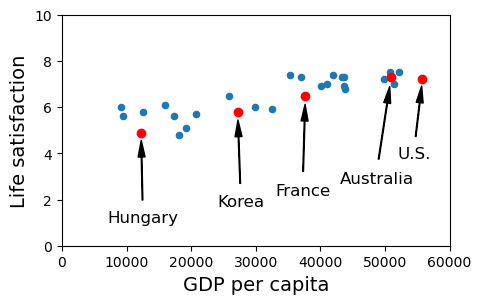

In [57]:
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

position_text = {
    "Hungary" : (7000, 1),
    "Korea" : (24000, 1.7),
    "France" : (33000, 2.2),
    "Australia" : (43000, 2.7),
    "United States" : (52000, 3.8)
}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]

    country = "U.S." if country == "United States" else country
    
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                xytext=pos_text,
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))

    plt.plot(pos_data_x, pos_data_y, "ro")

In [ ]:
sample_data.loc[list(position_text.keys())]

In [ ]:
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]

In [ ]:
np.array(sample_data["GDP per capita"][:5])

In [ ]:
Xsample[:5]

In [ ]:
ysample[:5]

In [ ]:
lin1.fit(Xsample, ysample)

In [ ]:
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]

print(f"절편:\t {t0}")
print(f"기울기:\t {t1}")

In [ ]:
# 산점도
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])

# 직선 그리기
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")

# 직선의 절편과 기울기 정보 명시
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

plt.show()